# <a name="top"></a>Tutorial of midiplot module

Authors: Carlos Hernández Oliván 

Department of Electronic Engineering and Communications, Universidad de Zaragoza, Calle María de Luna 3, 50018 Zaragoza

## Dependencies 

* [Numpy](https://numpy.org/)
* [Matplotlib](https://matplotlib.org/)
* [pretty_midi](https://github.com/craffel/pretty-midi)

## Modules


This library consists on different modules which are the following ones:

* **<span style="font-family:courier new">midiprocessing.py</span>**: for extract information from MIDI files and plot pianorolls.

    * Class **MidiProcessing**: process a MIDI file with **<span style="font-family:courier new">pretty_midi</span>** library.
    
    * Class **Pianoroll**: plot pianorolls given the tuple [pitch, note on, note off] of an instrument ot track. It also plots and subplots pianorolls of more than one instrument.
    
    * Function **writemidtrack**: creates a track given the tuple [pitch, note on, note off].
    
    * Function **savemiditrack**: saves the MIDI file in disk given the track created with <span style="font-family:courier new">writemidtrack</span> function, the output path and the name of the MIDI file.
    
    * Function **lists_to_tuple**: converts the lists of pitch, note on and note off events in a 3 tuple [pitch, note on, note off] of numpy arrays.
    
    * Function **note_sequence_to_tuple**: converts a note sequence in a 3 tuple [pitch, note on, note off] of numpy arrays.

<img src="https://4.bp.blogspot.com/-WELZsAfX1U0/Vl7UxvJNHdI/AAAAAAAAF34/9Kl1x1y0Uv4/s1600/separador.png" style="width:500px;"/>

## Table of Contents

- [0. Import](#import)

- [1. Ground Truth Extraction from Reference MIDI](#gtextract)
  
- [2. Getting Notes Sequences from Tracks or MIDI Files](#noteseq)

- [3. Plotting Pianorolls](#pianorolls)
    - [3.1. Plotting Single Track Pianorolls](#singlepianoroll)
    - [3.2. Comparing Multiple Track Pianorolls](#comparepianorolls)

- [References](#references)

## <a name="import"></a>0. IMPORT MODULES AND PATH SETTING

In [1]:
import sys
sys.path.append('..')
from midipianorolls import midiprocessing

%matplotlib inline

In [2]:
#path setting
dataset_path = '../example/'
song = 'midi_file.mid'

midi_infile = dataset_path + song

## <a name="gtextract"></a>1. GROUND TRUTH EXTRACTION FROM REFERENCE MIDI

If we have a MIDI file aligned with the wav file we can extract the track of the instrument from it in order to compare the ground truth with the track (or MIDI file) we'll generate after running crepe tracking algorithm. We do this before because we'll estimate the bpm of the ground truth MIDI file so we'll write the tracks and MIDI files of the crepe prediction with this value of bpm.

Bpm extraction is done with the subclass **<span style="font-family:courier new">estimate_bpm</span>** in **<span style="font-family:courier new">MidiProcessing</span>** class which uses **<span style="font-family:courier new">pretty_midi</span>** library.

In [3]:
m_gt = midiprocessing.MidiProcessing(midi_infile)

C:\ProgramData\Anaconda3\lib\site-packages\pretty_midi\pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [4]:
bpm = m_gt.estimate_bpm()

We can print the list of instruments and tracks with the help of **<span style="font-family:courier new">print_tracks</span>** subclass of **<span style="font-family:courier new">MidiProcessing</span>** class that is buid on **<span style="font-family:courier new">pretty_midi</span>** library.

In [5]:
all_tracks = m_gt.get_tracks()

In [6]:
m_gt.print_tracks()

Track no: 0 | Program no: 73 | Track name: Voice | is drum: False
Track no: 1 | Program no: 90 | Track name: Lead | is drum: False
Track no: 2 | Program no: 48 | Track name: Strings | is drum: False
Track no: 3 | Program no: 85 | Track name: Chorus | is drum: False
Track no: 4 | Program no: 35 | Track name: Bass #2 | is drum: False
Track no: 5 | Program no: 0 | Track name: Drums | is drum: True


We can obtain or tuple of [pitch, note on, note off] from a single track of the full MIDI file with **<span style="font-family:courier new">get_notestuple_of_singletrack_by_name</span>** subclass by giving the name of the track or we can obtain the tuple giving the number of the program of the track to **<span style="font-family:courier new">get_notestuple_of_singletrack_by_nprogram</span>** subclass.

All these subclasses belong to **<span style="font-family:courier new">MidiProcessing</span>** class which takes a MIDI file to process.

In [7]:
gt_matrix = m_gt.get_notestuple_of_singletrack_by_name('Voice')

In [8]:
gt_track = midiprocessing.writemidtrack(gt_matrix)

## <a name="pianorolls"></a>5. PLOTTING PIANOROLLS

We can plot the pianoroll of 2 or more tracks calling the following subclasses of **<span style="font-family:courier new">Pianoroll</span>** class:

* **<span style="font-family:courier new">plot_singletrack_pianoroll</span>**: plots a single track giving as an input the tuple of (pitch, note on and note off).

* **<span style="font-family:courier new">overlap_multitrack_pianorolls</span>**: plots two or more tracks overlapped in different colors giving as an input the tuples of (pitch, note on and note off) of the different tracks.

* **<span style="font-family:courier new">subplot_pianoroll</span>**: plots two or more tracks in different subplots giving as an input the tuples of (pitch, note on and note off) of the different tracks.

### <a name="singlepianoroll"></a>5.1. PLOTTING SINGLE TRACK PIANOROLLS

We can plot a single track pianoroll from a tuple of [pitch, note on, note off] with the subclass **<span style="font-family:courier new">plot_singletrack_pianoroll</span>** of **<span style="font-family:courier new">Pianoroll</span>** class in **<span style="font-family:courier new">midiprocessing.py</span>** script:

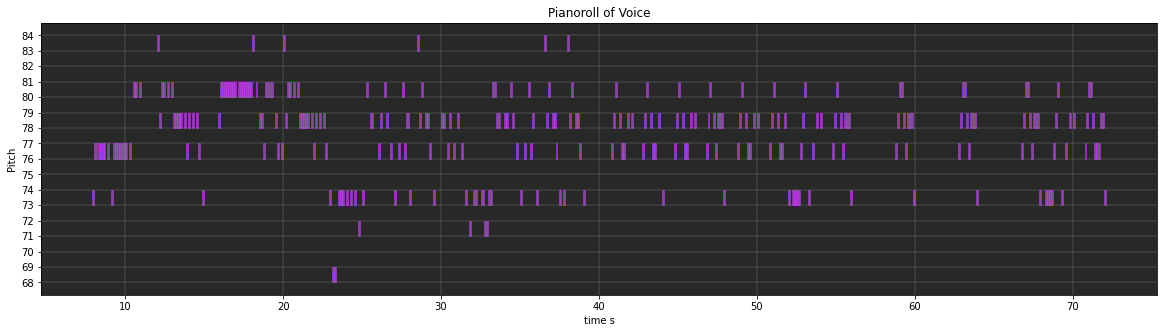

In [9]:
plotpianoroll = midiprocessing.Pianoroll()
plotpianoroll.plot_singletrack_pianoroll(gt_matrix, plot_title='Pianoroll of Voice')

If we have a note sequence and we want to plot its pianoroll, we can transform the note sequence into a tuple of [pitch, note on and note off] with the function **<span style="font-family:courier new">note_sequence_to_tuple</span>** in **<span style="font-family:courier new">midiprocessing.py</span>** script

(We can check that both pianorolls avobe plotted from the tuple of [pitch, note on, note off] and after converting the note sequence into a tuple are the same)

### <a name="comparepianorolls"></a>5.2. COMPARING MULTIPLE TRACK PIANOROLLS

In [10]:
instr_73 = m_gt.get_notestuple_of_singletrack_by_nprogram(73)
instr_90 = m_gt.get_notestuple_of_singletrack_by_nprogram(90)
instr_48 = m_gt.get_notestuple_of_singletrack_by_nprogram(48)
instr_85 = m_gt.get_notestuple_of_singletrack_by_nprogram(85)
instr_35 = m_gt.get_notestuple_of_singletrack_by_nprogram(35)

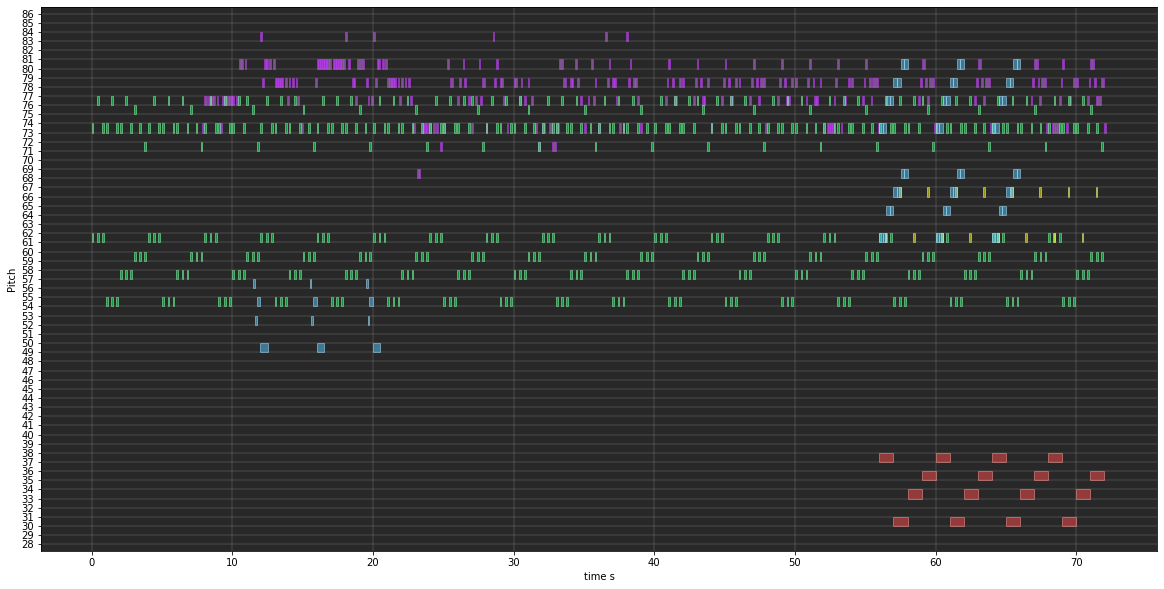

In [11]:
plotpianoroll.overlap_multitrack_pianorolls(instr_73, instr_90, instr_48, instr_85, instr_35)

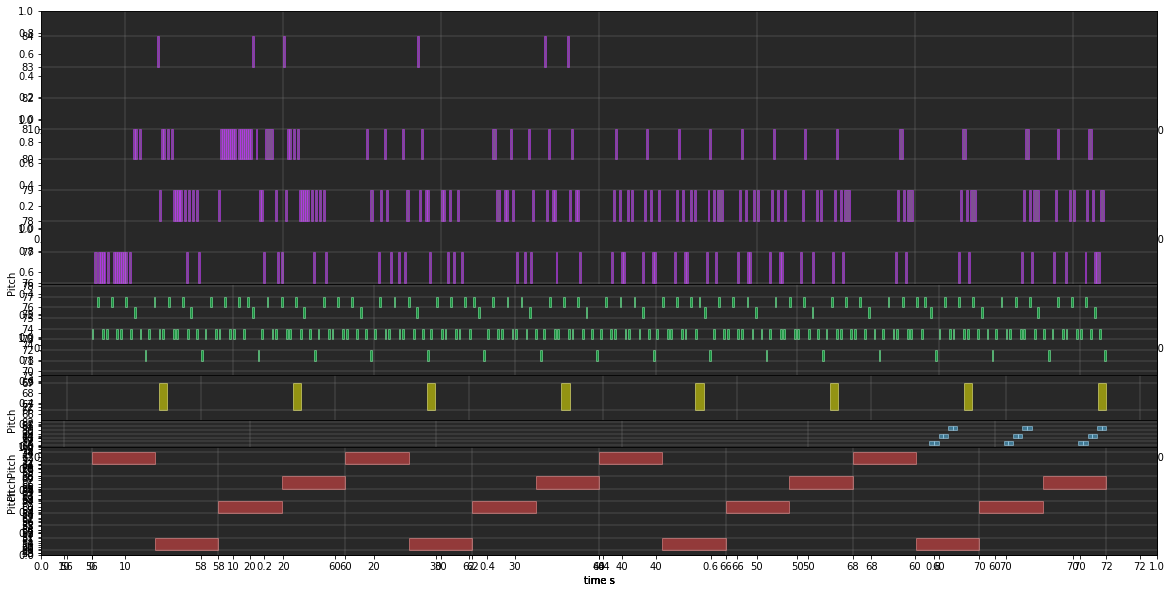

In [12]:
plotpianoroll.subplot_pianoroll(instr_73, instr_90, instr_48, instr_85, instr_35)

# <a name="references"></a>REFERENCES

* https://github.com/marl/crepe
* https://craffel.github.io/mir_eval/
* https://craffel.github.io/pretty-midi/

<img src="https://4.bp.blogspot.com/-WELZsAfX1U0/Vl7UxvJNHdI/AAAAAAAAF34/9Kl1x1y0Uv4/s1600/separador.png" style="width:500px;"/>